[View in Colaboratory](https://colab.research.google.com/github/fabiocalderon/ect2702-ml/blob/master/classificacao-svm.ipynb)

In [0]:
# Support Vector Machine (SVM)
# from https://www.superdatascience.com/machine-learning/ 


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "xor_3.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados

xor_3.csv


In [3]:
# Importing the dataset
dataset = pd.read_csv(DATA_PATH+FILE_TO_DOWNLOAD)


dataset.head(  )

,a,b,xor
0,-1.0,-0.6,0
1,-1.0,0.2,1
2,-1.0,1.0,1
3,-0.8,-0.4,0
4,-0.8,0.4,1


In [9]:
X = dataset.iloc[:,0:2].values
y = dataset.iloc[:,2].values

print(X[0:6,:])
print(y[0:6:])

[[-1.  -0.6]
 [-1.   0.2]
 [-1.   1. ]
 [-0.8 -0.4]
 [-0.8  0.4]
 [-0.6  0. ]]
[0 1 1 0 1 0]


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

classifier = Pipeline((("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf", gamma=1, C=20))))

classifier.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

[1 1 1 1 0 0 1 1]
[1 1 1 1 0 0 1 1]


In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[2 0]
 [0 6]]


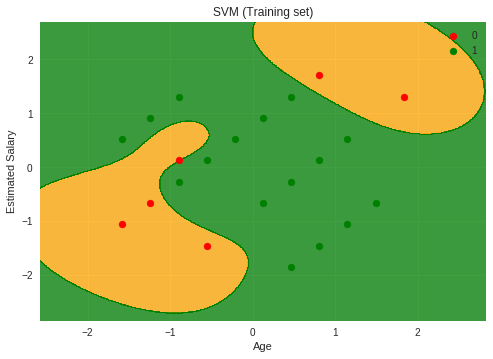

In [20]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()